# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model

In [3]:
from sklearn.model_selection import train_test_split

# Importing dataset

In [5]:
data=pd.read_csv('HousingData.csv')

In [6]:
#read first 10 rows of dataset
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# Checking for null values

In [8]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
# dropping null values
data=data.dropna()

In [12]:
data.isnull().sum()#rechecking for null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
# linear regression with two variables
# independent variable:'MEDV'
#Ddependent variable: 'LSTAT'
data1=data.loc[:,['MEDV','LSTAT']]# create a table with only two columns
data1.head(5)


,MEDV,LSTAT
0,24.0,4.98
1,21.6,9.14
2,34.7,4.03
3,33.4,2.94
5,28.7,5.21


# Visualizing the data

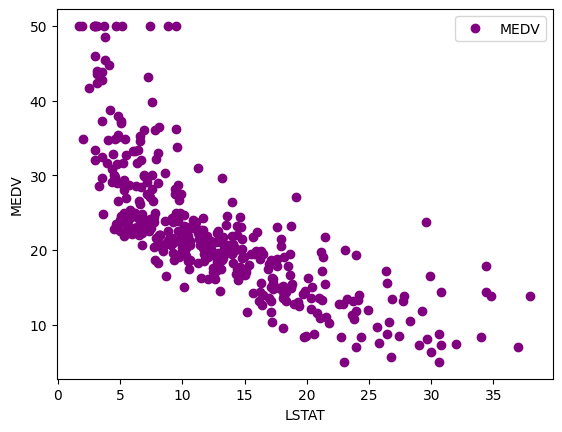

In [16]:
data.plot(x='LSTAT',y='MEDV',style='o',color='purple')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

# Dividing data into dependent and independent variable

In [17]:
X=pd.DataFrame(data.LSTAT)
Y=pd.DataFrame(data.MEDV)

# Splitting data into training and testing
# X_train, Xtest, Y_train, Y_test

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

# Checking size of training and testing sets

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(275, 1)
(119, 1)
(275, 1)
(119, 1)


# Training Algorithm

 We are storing the Linear Regression in a variable called regressor

Then we are fitting the X_train, y_train in regressor.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

# Checking the intercept

We are checking the intercept i.e.'c' from y=mx+c

This line is the linear regression line from the above algorithm which we fitted.

In [24]:
print(regressor.intercept_)

[34.944997]


# Checking slope

This is the slope 'm' from y=mx+c

In [26]:
print(regressor.coef_)

[[-1.00135706]]


# Checking model evaluation using Root-mean square error

In [27]:
Y_train_predict=regressor.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train,Y_train_predict)))
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

print("\n")

The model performance for training set
--------------------------------------
RMSE is 6.009611655189927




In [28]:
Y_test_predict = regressor.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))


print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for testing set
--------------------------------------
RMSE is 6.407194718831085


In [30]:
print(Y_test_predict)

[[23.58960797]
 [25.42209139]
 [15.90919935]
 [ 8.48914355]
 [27.49490049]
 [31.40019302]
 [28.72656967]
 [22.65834591]
 [28.28597257]
 [20.8258625 ]
 [17.65156063]
 [24.96146714]
 [11.64341828]
 [31.7807087 ]
 [16.23964718]
 [29.72792673]
 [20.28512968]
 [29.74795387]
 [ 4.97438029]
 [26.28325846]
 [25.48217281]
 [23.28920086]
 [ 5.6152488 ]
 [27.5950362 ]
 [15.76900936]
 [ 7.52784078]
 [22.49812878]
 [ 4.09318608]
 [29.2973432 ]
 [24.96146714]
 [17.13085496]
 [18.89324338]
 [29.64781817]
 [17.3211128 ]
 [31.38016588]
 [17.00067854]
 [32.06108867]
 [14.99796442]
 [28.00559259]
 [16.19959289]
 [30.19856455]
 [29.41750604]
 [13.46588813]
 [19.8044783 ]
 [19.53411189]
 [31.12982661]
 [16.99066497]
 [28.94686823]
 [25.41207782]
 [19.37389476]
 [24.66106002]
 [31.41020659]
 [27.54496835]
 [25.85267492]
 [17.7617099 ]
 [25.00152142]
 [ 9.23014778]
 [21.0962289 ]
 [13.59606454]
 [16.79039356]
 [-3.07653045]
 [28.18583686]
 [30.48895809]
 [27.23454766]
 [30.08841527]
 [28.66648825]
 [ 0.12781